# Imports

In [35]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nlp = spacy.load("en_core_web_sm")
# stopwords = nlp.Defaults.stop_words
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint
from sklearn.decomposition import NMF
from sklearn import preprocessing
from nltk import ngrams
from nltk import FreqDist
# nltk.download('all')

In [2]:
# charts
import matplotlib.pyplot as plt
import seaborn as sns
import os
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [3]:
#warnings
import warnings
warnings.filterwarnings('ignore')

#options
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# Functions

### 1. Data cleaning

In [4]:
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    clean_text = re.sub('\S*\d\S*\s*', '', clean_text)
    
    return clean_text

def remove_punctuation(text):
    punctuation = text.translate(str.maketrans('', '', string.punctuation))
    return punctuation

def convert_to_lowercase(text):
    text_lower = text.lower()
    return text_lower

def tokenization(text):
    tokens  = word_tokenize(text)

    return ' '.join(tokens)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
    

def lem_text(text):
    doc = nlp(text)
    lemma = ' '.join([token.lemma_ for token in doc])
    
    return lemma

def replace(text):
    replaced = text.replace('xxxx', '').replace('-PRON-', '')

    return replaced



### 2. Merge cleaning functions for one function

In [5]:
def preprocessing_data(text):
    
    text = remove_special_characters(text) #pass
    text = remove_punctuation(text) #pass
    text = convert_to_lowercase(text) #pass
    text = tokenization(text) #pass
    text = remove_stopwords(text) #pass
    text = lem_text(text) #pass
    text = replace(text) #pass
    return text

### 3. Restore basic forms of words

In [6]:
def lemmatization(text):
    doc = nlp(text)
    lem_tokens = [token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS]
    return ' '.join(lem_tokens)
    
    # return lem_text

def stemming(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stem_words = [stemmer.stem(word) for word in words if word.text.lower() not in STOP_WORDS]
    return ' '.join(stem_words)

    # return stem_text

def remove_POS_tags(text):
    doc = nlp(text)
    result = [token.text for token in doc if token.tag_ == 'NN']  # check for nouns
    return ' '.join(result)
    # return remove_pos


#Write your function to extract the POS tags NN
# def extract_pos_tags(text):
#     doc = nlp(text)
#     sent = [token.text for token in doc if token.tag_ == 'NN']
#     return ' '.join(sent)

# finding ngrams

In [113]:
def get_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return list(n_grams)

def get_top_ngrams(data, n, top=30):
    combined_text = ' '.join(data.astype(str))
    n_grams = get_ngrams(combined_text, n)
    freq_dist = FreqDist(n_grams)
    return freq_dist.most_common(top)

# Importing data 

### dataset - https://www.kaggle.com/datasets/abhishek14398/automatic-ticket-classification-dataset/data

In [7]:
path = "complaints.json"
open_path = open(path) 
read_data = json.load(open_path)
df=pd.json_normalize(read_data)

In [8]:
df = df[['_source.complaint_what_happened','_source.product','_source.sub_product']]
df = df.rename(columns={'_source.complaint_what_happened': 'complaint_text', '_source.product': 'category','_source.sub_product': 'sub_category'})

# data modelling
df['category'] = df['category'] + '+' + df['sub_category']
df = df.drop(['sub_category'],axis= 1)
df[df['complaint_text']==''] = np.nan
df = df[~df['complaint_text'].isnull()]

# text cleaning

In [9]:

data = df # replace to have possibility to load back original data
data['clean'] = data['complaint_text'].apply(lambda x: preprocessing_data(x)) # new column with preprocessed data
# data_new['clean'] = data_new['clean'].apply(lambda x: remove_POS_tags(x))
data['clean'] = data['clean'].apply(lambda x: preprocessing_data(x))
data['clean'] = data['clean'].apply(lambda x: remove_POS_tags(x))
data.head()

,complaint_text,category,clean
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt,morning name appreciate bank service write cha...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date agent info...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o...",book ticket offer ticket reward card informati...
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account,son check deposit chase account fund account m...


### Check data

(array([8.795e+03, 6.439e+03, 2.881e+03, 1.311e+03, 8.070e+02, 3.590e+02,
        1.570e+02, 8.200e+01, 5.700e+01, 4.600e+01, 3.100e+01, 2.500e+01,
        1.200e+01, 1.400e+01, 1.100e+01, 5.000e+00, 5.000e+00, 7.000e+00,
        2.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,   249.4,   498.8,   748.2,   997.6,  1247. ,  1496.4,
         1745.8,  1995.2,  2244.6,  2494. ,  2743.4,  2992.8,  3242.2,
         3491.6,  3741. ,  3990.4,  4239.8,  4489.2,  4738.6,  4988. ,
         5237.4,  5486.8,  5736.2,  5985.6,  6235. ,  6484.4,  6733.8,
         6983.2,  7232.6,  7482. ,  7731.4,  7980.8,  8230.2,  8479.6,
         8729. ,  897

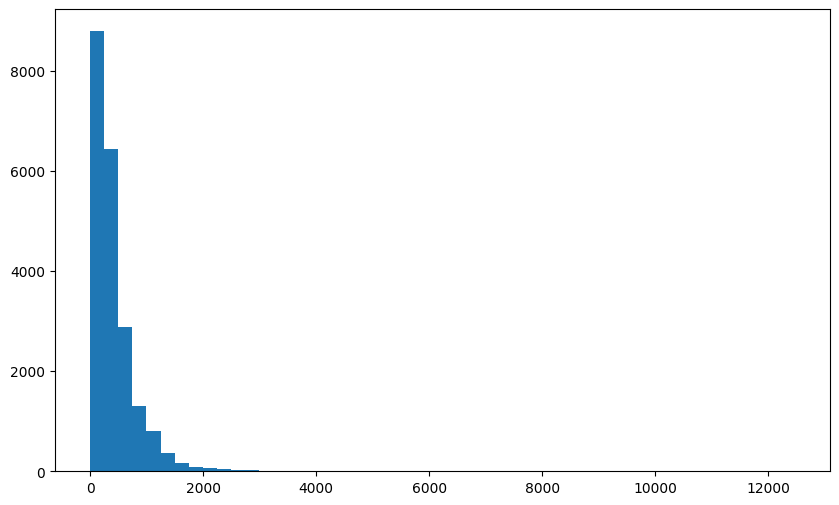

In [10]:
# Write your code here to visualise the data according to the 'Complaint' character length

plt.figure(figsize=(10,6))
# doc_lens = [len(d) for d in data.clean]
doc_lens = [len(d) for d in data.clean]
plt.hist(doc_lens, bins = 50)

In [11]:
data.head()

,complaint_text,category,clean
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt,morning name appreciate bank service write cha...
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date agent info...
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o...",book ticket offer ticket reward card informati...
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account,son check deposit chase account fund account m...


# Topic Modelling
### in this dataset I have too much categories, so my plan is to change quantity of categories to 5.
### This can be done by NFM or LDA
###
###
###

##### vectorizer - TFIDF

In [12]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, stop_words='english')
dtm = vectorizer.fit_transform(data['clean']) # document term metrix
# vectorizer.get_feature_names_out()[:10]

In [13]:
dtm

<21072x6950 sparse matrix of type '<class 'numpy.float64'>'
	with 680360 stored elements in Compressed Sparse Row format>

# Topic Modelling

### Finding top n-grams

In [115]:
top_unigrams = get_top_ngrams(data['clean'], 1)
top_bigrams = get_top_ngrams(data['clean'], 2)
top_trigrams = get_top_ngrams(data['clean'], 3)

In [119]:
top_unigrams[:5]

[(('chase',), 59224),
 (('account',), 43657),
 (('credit',), 33786),
 (('card',), 30192),
 (('payment',), 21164)]

In [120]:
top_bigrams[:5]

[(('credit', 'card'), 12813),
 (('call', 'chase'), 3981),
 (('credit', 'report'), 3978),
 (('chase', 'credit'), 3375),
 (('check', 'account'), 3188)]

In [121]:
top_trigrams[:5]

[(('chase', 'credit', 'card'), 2435),
 (('credit', 'card', 'account'), 1066),
 (('credit', 'card', 'company'), 970),
 (('credit', 'card', 'chase'), 749),
 (('chase', 'customer', 'service'), 590)]

### NFM

In [14]:
model = NMF(n_components=5, random_state=42)

In [15]:
model.fit(dtm)

NMF(n_components=5, random_state=42)

In [16]:
feature_names  = vectorizer.get_feature_names_out()

In [17]:
# change dtype from object to int
feature_mapping = {feature: idx for idx, feature in enumerate(feature_names)}
features_int = [feature_mapping[feature] for feature in feature_names]
print(features_int)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [18]:
for index,topic in enumerate(model.components_):
    # print("top 15 words for topic",  index)
    top_words_indices = topic.argsort()[-15:]
    top_words = [features_int[i] for i in top_words_indices]
    # print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    # print(top_words)
    # print('\n')

In [19]:
topics = model.transform(dtm)
dominant_topics = topics.argmax(axis=1)

In [20]:
data['Topic'] = dominant_topics

In [21]:
data.head()

,complaint_text,category,clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt,morning name appreciate bank service write cha...,2
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date agent info...,1
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...,3
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o...",book ticket offer ticket reward card informati...,3
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account,son check deposit chase account fund account m...,0


In [22]:
data['Topic'].value_counts()

Topic
1    6288
0    5393
2    3866
3    3133
4    2392
Name: count, dtype: int64

In [23]:
for index,topic in enumerate(model.components_):
    print("top 15 words for topic",  index)
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

top 15 words for topic 0
['customer', 'claim', 'business', 'number', 'transaction', 'transfer', 'day', 'branch', 'fund', 'chase', 'deposit', 'money', 'bank', 'check', 'account']


top 15 words for topic 1
['claim', 'time', 'balance', 'use', 'fraud', 'merchant', 'service', 'transaction', 'fee', 'purchase', 'dispute', 'credit', 'chase', 'charge', 'card']


top 15 words for topic 2
['refinance', 'sale', 'foreclosure', 'request', 'time', 'rate', 'document', 'letter', 'year', 'property', 'home', 'modification', 'chase', 'mortgage', 'loan']


top 15 words for topic 3
['limit', 'remove', 'application', 'identity', 'chase', 'information', 'reporting', 'debt', 'company', 'score', 'account', 'card', 'inquiry', 'report', 'credit']


top 15 words for topic 4
['mortgage', 'year', 'credit', 'account', 'date', 'auto', 'day', 'chase', 'time', 'statement', 'fee', 'pay', 'month', 'balance', 'payment']




In [25]:
data.head()

,complaint_text,category,clean,Topic
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection+Credit card debt,morning name appreciate bank service write cha...,2
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card+General-purpose cr...,card agent upgrade anniversary date agent info...,1
10,Chase Card was reported on XX/XX/2019. However...,"Credit reporting, credit repair services, or o...",chase card report application submit identity ...,3
11,"On XX/XX/2018, while trying to book a XXXX XX...","Credit reporting, credit repair services, or o...",book ticket offer ticket reward card informati...,3
14,my grand son give me check for {$1600.00} i de...,Checking or savings account+Checking account,son check deposit chase account fund account m...,0
